In [31]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.optimize import minimize 

In [92]:
x0 = np.array([2., 0.])
x1 = np.array([2., 1.1])
x2 = np.array([2., 2.])
x3 = np.array([1.1, 2.2])
x4 = np.array([0., 2.1])
x5 = np.array([0., 3.])
x6 = np.array([0., 4.])

In [93]:
def norm(a):
    return np.linalg.norm(a);

def normal(t):
    tx, ty = t
    n = np.array([-ty, tx]);
    return n

def tangent(a, b, c):
    d1 = norm(b-a);
    d2 = norm(c-b)
    t = -a*d2/d1/(d1+d2) -b*(d1-d2)/d1/d2 + c*d1/d2/(d1+d2);
    l = norm(t);
    return (t/l)

def kappa(t1, t2, a, b):
    n = normal(b-a);  
    kn = t2 - t1;
    kappa = norm(kn)*np.sign(np.dot(kn,n))/norm(n);
    return kappa;
    
def tangent2(ta, tb, a, b):
    n = tb - ta;
    n = n*np.sign(kappa(ta, tb, a, b))/norm(n);
    t = -normal(n);
    return t;

def centroid(a,b):
    c = (a+b)*0.5
    return c;
   

In [94]:
def Hermite(a,b,ta,tb,s):
    l = norm(a-b);
    return ((2*(a-b) + l*(ta+tb))*s*s*s + (-3*(a-b) - l*(2*ta+tb))*s*s +  l*ta*s + a)

def dHermite(a,b,ta,tb,s):
    l = norm(a-b);
    t = 3*(2*(a-b)/l + (ta+tb))*s*s + 2*(-3*(a-b)/l - (2*ta+tb))*s +  ta
    return (t/norm(t))

In [95]:
def kappa5(a,b,c,d,e):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    td = tangent(c,d,e);
    xl = Hermite(b,c,tb,tc,0.5);
    xr = Hermite(c,d,tc,td,0.5);
    tl = dHermite(b,c,tb,tc,0.5);
    tr = dHermite(c,d,tc,td,0.5);
    return (kappa(tl, tr, xl, xr))
def kappa4(a,b,c,d):
    tb = tangent(a,b,c);
    tc = tangent(b,c,d);
    return (kappa(tb, tc, b, c))

In [96]:
print(kappa5(x0,x1,x2,x3,x4), kappa5(x1,x2,x3,x4,x5), kappa5(x2,x3,x4,x5,x6))

1.8713799094145207 0.3715483537518168 -2.292922986616875


In [97]:
#p0 = np.array([0.,0.]);
u0 = 0.;
def objective(u): 
    n = normal(tangent(x2,x3,x4));
    v = u*n;
    kl = kappa5(x0,x1,x2,x3+v,x4);
    km = kappa5(x1,x2,x3+v,x4,x5);
    kr = kappa5(x2,x3+v,x4,x5,x6);
    o = np.power(2*km-kl-kr, 2);
    return o;

def objective2(u): 
    n = normal(tangent(x2,x3,x4));
    v = u*n;
    kl = kappa4(x1,x2,x3+v,x4);
    km = kappa5(x1,x2,x3+v,x4,x5);
    kr = kappa4(x2,x3+v,x4,x5);
    o = np.power(2*km-kl-kr, 2);
    return o;

In [98]:
objective(u0)
res = minimize(objective, u0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})
ua = res.x
objective2(u0)
res = minimize(objective2, u0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})
ub = res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 64


In [99]:
X0 = np.array([x0,x1,x2,x3,x4,x5,x6]); X0 = np.transpose(X0)
n_x3 = normal(tangent(x2,x3,x4))
Xfa = np.array([x0,x1,x2,x3+ua*n_x3,x4,x5,x6]); Xfa = np.transpose(Xfa)
Xfb = np.array([x0,x1,x2,x3+ub*n_x3,x4,x5,x6]); Xfb = np.transpose(Xfb)

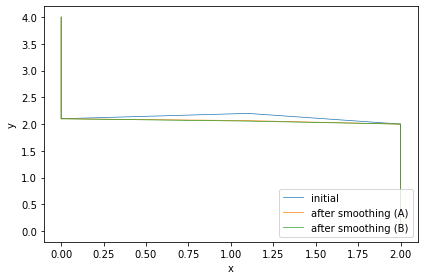

In [100]:
P0,Q0 = X0
Pfa,Qfa = Xfa
Pfb,Qfb = Xfb

fig, ax1 = plt.subplots()

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.plot(P0,Q0, linewidth = 0.7, label = "initial")
ax1.plot(Pfa,Qfa, linewidth = 0.7, label = "after smoothing (A)")
ax1.plot(Pfb,Qfb, linewidth = 0.7, label = "after smoothing (B)")


ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [102]:
print(kappa5(x0,x1,x2,x3+n_x3*ua,x4), kappa5(x1,x2,x3+n_x3*ua,x4,x5), kappa5(x2,x3+n_x3*ua,x4,x5,x6))

2.168301745343499 0.05756468145368951 -2.0531724047936986


In [103]:
print(kappa5(x0,x1,x2,x3+n_x3*ub,x4), kappa5(x1,x2,x3+n_x3*ub,x4,x5), kappa5(x2,x3+n_x3*ub,x4,x5,x6))

2.1885394521337616 0.03572163314140921 -2.036508443346481
